### Name: Ntwali Bruno Bahongere  
#### Course: Advanced Big Data and Data Mining
#### Clustering Analysis Using K-Means and K-Medoids Algorithms


In [5]:
#imports

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids

In [6]:
#Load the wine dataset
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# Display basic statistics for each feature
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [8]:
# Show the number of samples per class
print("\nClass distribution:")
print(df['target'].value_counts())


Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


In [9]:
# Create a StandardScaler object
scaler = StandardScaler()

# Get only the feature columns (exclude the target column)
feature_columns = df.columns[:-1]

# Apply z-score normalization
df_scaled = df.copy()
df_scaled[feature_columns] = scaler.fit_transform(df[feature_columns])

# Display the first few rows of the standardized data
print("Standardized data:")
df_scaled.head()

Standardized data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [10]:
# Implementing K-Means with k=3 (matching the number of classes in the Wine dataset)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the model on the scaled features
kmeans.fit(df_scaled[feature_columns])

# Getting the cluster labels
cluster_labels = kmeans.labels_

# Calculate the Silhouette Score
silhouette = silhouette_score(df_scaled[feature_columns], cluster_labels)

# Calculate the Adjusted Rand Index (comparing with actual class labels)
ari = adjusted_rand_score(df['target'], cluster_labels)

# Print the results
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")


Silhouette Score: 0.2849
Adjusted Rand Index: 0.8975


c:\Users\nbaho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


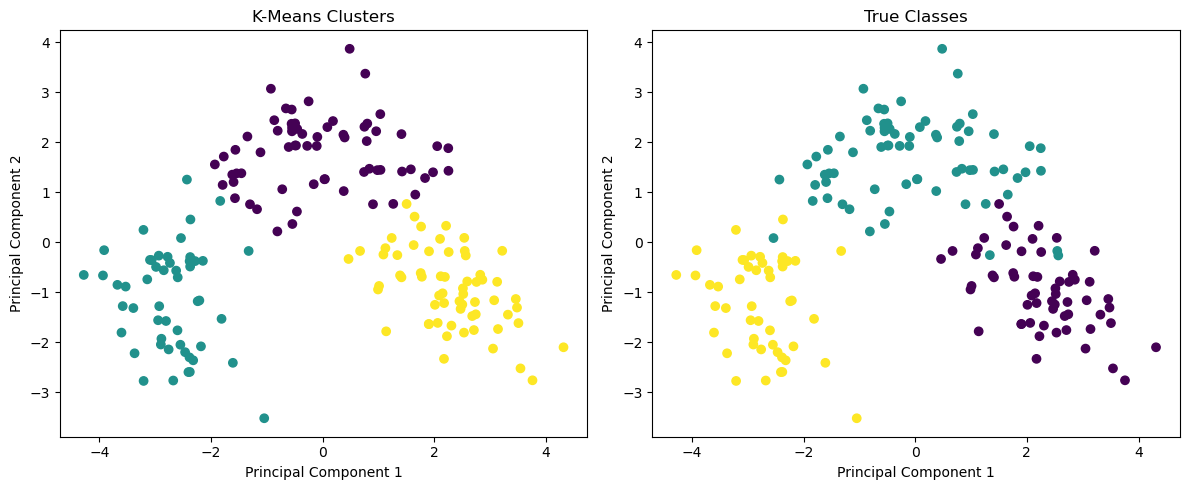

In [11]:
# Visualize the clusters and the true labels using PCA for dimensionality reduction

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled[feature_columns])

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the clusters
plt.figure(figsize=(12, 5))

# Plot K-means clusters
plt.subplot(1, 2, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot true labels
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['target'], cmap='viridis')
plt.title('True Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

c:\Users\nbaho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\nbaho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


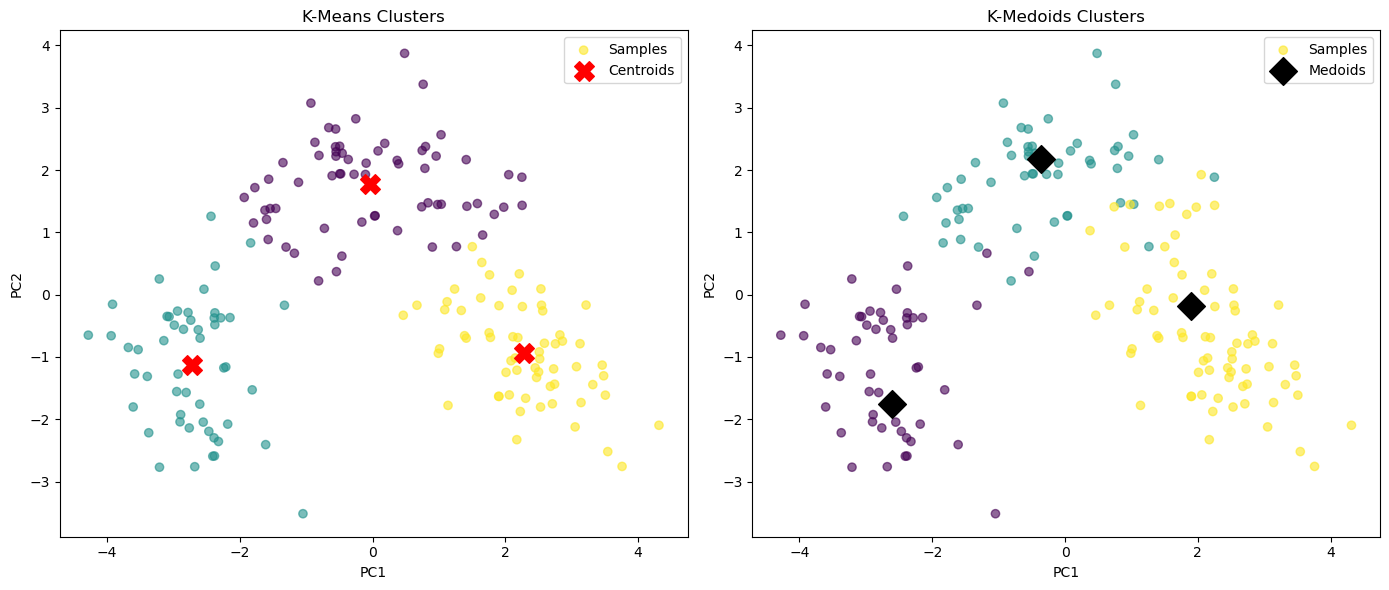

Analysis:
- K-Means centroids are marked with red X, K-Medoids medoids with black diamonds.
- K-Means tends to form more spherical clusters, while K-Medoids can adapt to more arbitrary shapes.
- K-Means is generally faster and works well when clusters are compact and spherical.


In [13]:
# Fit K-Medoids on the scaled features
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(df_scaled[feature_columns])
kmedoids_labels = kmedoids.labels_

# Project K-Medoids medoids to PCA space
medoids_pca = pca.transform(kmedoids.cluster_centers_)

# Project K-Means centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(14, 6))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis', alpha=0.6, label='Samples')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# K-Medoids plot
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmedoids_labels, cmap='viridis', alpha=0.6, label='Samples')
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], c='black', marker='D', s=200, label='Medoids')
plt.title('K-Medoids Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.tight_layout()
plt.show()

# Brief analysis
print("Analysis:")
print("- K-Means centroids are marked with red X, K-Medoids medoids with black diamonds.")
print("- K-Means tends to form more spherical clusters, while K-Medoids can adapt to more arbitrary shapes.")
print("- K-Means is generally faster and works well when clusters are compact and spherical.")